Import relevant packages

In [1]:
# imports
import pandas as pd
import os
from collections import Counter, defaultdict
import numpy as np

import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

tokenizer = RegexpTokenizer(r'\w+')

stop_words = set(stopwords.words('english'))
wnl = nltk.WordNetLemmatizer() 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This notebook will focus on more text and sentiment analysis on the lyrics we obtained from the Genius API.

This is an extension of Cristana's text analysis.

In [6]:
# load spotify dataset
spotify_df = pd.read_pickle('/content/drive/MyDrive/University Materials/Business Analytics/Y3S1/02805 Social graphs & interactions/Data/Spotify Network/spotify_dataset_processed.pickle') 
# load artists dataset
artists_df = pd.read_pickle('/content/drive/MyDrive/University Materials/Business Analytics/Y3S1/02805 Social graphs & interactions/Data/Spotify Network/artists_dataset.pickle') 
# load tracks dataset
tracks_df = pd.read_pickle('/content/drive/MyDrive/University Materials/Business Analytics/Y3S1/02805 Social graphs & interactions/Data/Spotify Network/tracks_dataset_lyrics.pickle') 

In [5]:
tracks_df

,track,lyrics,trackfreq,trackname,artistname,genre,tokens,sentiment
3,"[Good People, [jack johnson]]","\nOh you win, it's your show now\nSo what's it...",204,Good People,[jack johnson],[neo mellow],"[oh, you, win, it, s, your, show, now, so, wha...",5.412033
7,"[Habits (Stay High), [tove lo]]","\nOh-oh, oh-oh, oh-oh\n\n\nI eat my dinner in ...",419,Habits (Stay High),[tove lo],"[dance pop, electropop, metropopolis, pop, swe...","[oh, oh, oh, oh, oh, oh, i, eat, my, dinner, i...",5.322526
11,"[Killing Me Softly With His Song, [roberta fla...",\nStrumming my pain with his fingers\nSinging ...,186,Killing Me Softly With His Song,[roberta flack],"[adult standards, classic soul, disco, funk, m...","[strumming, my, pain, with, his, fingers, sing...",5.456962
14,"[Around Us, [jónsi]]",\nI see the walls and see them fall\nYou break...,74,Around Us,[jónsi],"[icelandic pop, post-rock]","[i, see, the, walls, and, see, them, fall, you...",5.578108
18,"[Driving Home For Christmas, [chris rea]]","\nI'm driving home for Christmas\nOh, I can't ...",155,Driving Home For Christmas,[chris rea],[],"[i, m, driving, home, for, christmas, oh, i, c...",5.594937
...,...,...,...,...,...,...,...,...
23150,"[Fugitive Air, [of montreal]]","I do wrong, strictly speaking, just for myself...",51,Fugitive Air,[of montreal],"[alternative rock, anti-folk, art pop, baroque...","[i, do, wrong, strictly, speaking, just, for, ...",5.338601
23158,"[Too Drunk To Fuck, [nouvelle vague]]",Went to a party\nI danced all night\nI drank s...,66,Too Drunk To Fuck,[nouvelle vague],[],"[went, to, a, party, i, danced, all, night, i,...",5.423393
23160,"[Broken Record, [katy b]]",\nI would toss and turn at night with your voi...,60,Broken Record,[katy b],"[dance pop, electropop, hip house, uk funky, u...","[i, would, toss, and, turn, at, night, with, y...",5.528119
23163,"[Afterlife, [arcade fire]]","\nAfterlife, oh my God, what an awful word\nAf...",410,Afterlife,[arcade fire],"[baroque pop, canadian indie, indie rock, mode...","[afterlife, oh, my, god, what, an, awful, word...",5.243704


Obtain top 5 genres by popularity for analysis

In [7]:
# compute the genre frequency
genre_counter = Counter([g for genre in tracks_df.genre for g in genre])
# extract 5 most common genres
genres_5 = genre_counter.most_common(5)
print("Top 5 genres:\n")
for g, _ in genres_5:
    print(g)

Top 5 genres:

dance pop
rock
pop
hip hop
classic rock


Plot word cloud function from before

In [8]:
# Plot word cloud
def plot_word_cloud(document, title):
    wc = WordCloud(
            background_color="white", 
            max_words=4000, contour_width=3, 
            contour_color='steelblue', 
            collocations=False
        ).generate(document)

    plt.figure(figsize=[8,4])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

Earlier, we analyzed the lyrics in the top 5 genres (by popularity) using word clouds.

We now visualize the artists within the top 5 genres using a word cloud.

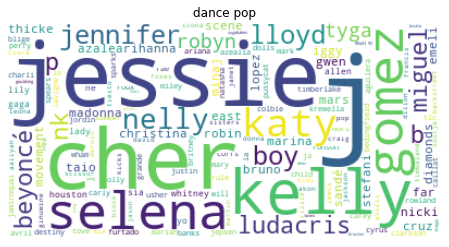

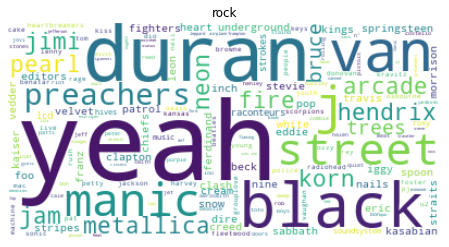

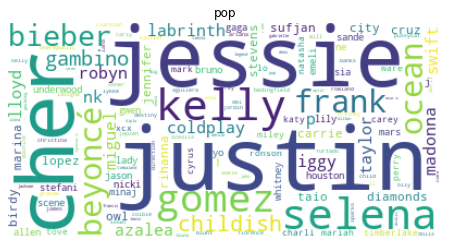

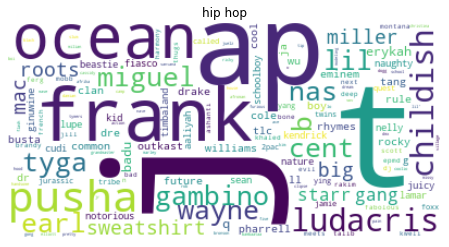

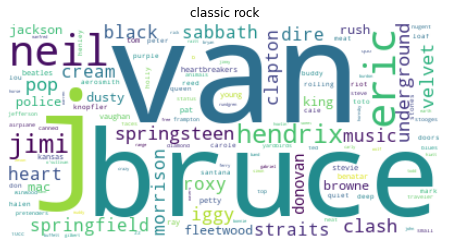

In [25]:
genre_artists = {}

for genre, _ in genres_5:
  genre_artists[genre] = ''
  for artists in tracks_df[tracks_df['genre'].str.contains(genre, regex=False)]['artistname']:
    for artist in artists:
      genre_artists[genre] += artist + ' '
  plot_word_cloud(genre_artists[genre], genre)

From these graphs, we can see some very intriguing trends, specifically, in the popularity of artist Jessie J. She appears very prominently across all the top 5 genres. We theorized some reasons for this.

For one, these top 5 genres have quite a substantial overlap. Spotify has a wide plethora of different genres, and some of them tend to be very similar to others. Each artist can be associated with multiple genres. For example, dance pop is essentially a subset of pop; it would not be a stretch to say that a lot of songs classified under dance pop are also classified under pop. Some rock songs are also classified under pop. As such, it would not be unsurprising to see that artists that are prominent in a genre like pop, are also prominent in a genre like dance pop. A quick Google search verifies that Jessie J's main genres are in pop, hip-hop and rock. As we can see, she appears very prominently in all the above.

Another reason is because our sampled data was not fully representative of all Spotify listeners. We faced computational bottlenecks when extracting the data from the relevant sources. We had to sample a dataset that was not too large to work with. While this sped up computations substantially, it meant that our findings could not be directly translated to the Spotify listener population at large. One would expect popular rock artists like The Rolling Stones or The Beatles to show up in the rock or classic rock word cloud, but they were not present. 


Next, we plotted some useful visualizations in the form of **the distribution of the sentiment scores by genre.**

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


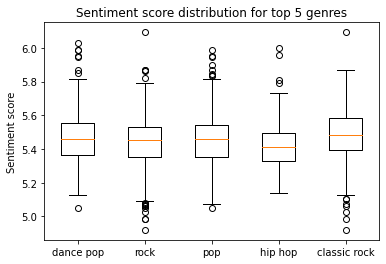

In [36]:
genre_sentiments = {}

for genre, _ in genres_5:
  genre_sentiments[genre] = []
  for sentiment in tracks_df[tracks_df['genre'].str.contains(genre, regex=False)]['sentiment']:
    genre_sentiments[genre].append(sentiment)

# plot the boxplots of sentiment scores
data = [genre_sentiments[genre] for genre, _ in genres_5]
fig, ax = plt.subplots()
ax.set_title('Sentiment score distribution for top 5 genres')
ax.boxplot(data)
ax.set_ylabel('Sentiment score')
ax.set_xticklabels(genre_sentiments.keys())

plt.show()

From the boxplots here, we can see that amongst the top 5 genres, classic rock has the highest median sentiment scores, while hip-hop has the lowest median sentiment scores.

This might be due to the words used in the songs. Within hip-hop, there are words with negative connotations being thrown around quite frequently. From the previous word cloud we analyzed on the lyrics of the top 5 genres, we can see that within hip-hop, we have words like 'shit', 'poo', and 'thug', which are all words that don't have a high sentiment score. 

That being said, classic rock has words that we did not expect to garner higher sentiment scores. As mentioned earlier, words like 'peggy', 'hurdy', 'gurdy', do not intuitively correlate to positive connotations.